In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
df1 = pd.read_csv('NHIS_OPEN_GJ_2017_100.csv',encoding='EUC-KR')

In [3]:
df1 = df1[['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', 
              '수축기혈압','이완기혈압', '식전혈당(공복혈당)']].copy()

In [4]:
df1 = df1.rename(columns={"연령대코드(5세단위)":"연령대코드",
                         "신장(5Cm단위)":"신장",
                         "체중(5Kg단위)":"체중",
                         "식전혈당(공복혈당)":"식전혈당"})

In [5]:
df1.head()

,성별코드,연령대코드,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당
0,1,8,170,75,90.0,120.0,80.0,99.0
1,1,7,180,80,89.0,130.0,82.0,106.0
2,1,9,165,75,91.0,120.0,70.0,98.0
3,1,11,175,80,91.0,145.0,87.0,95.0
4,1,11,165,60,80.0,138.0,82.0,101.0


In [6]:
df1.shape

(1000000, 8)

In [7]:
df1.isnull().sum()

성별코드       0
연령대코드      0
신장         0
체중         0
허리둘레     266
수축기혈압     19
이완기혈압     18
식전혈당      42
dtype: int64

In [8]:
df1 = df1.dropna(how="any").copy()

In [9]:
df1.shape

(999678, 8)

In [10]:
df1.isnull().sum()

성별코드     0
연령대코드    0
신장       0
체중       0
허리둘레     0
수축기혈압    0
이완기혈압    0
식전혈당     0
dtype: int64

In [11]:
df1 = df1.loc[df1['허리둘레'] < 140]
df1 = df1.loc[df1['허리둘레'] > 40]

In [12]:
df1.shape

(999608, 8)

In [13]:
def draw_plot(column):
    sns.countplot(data=df1, x = column, palette='light:#5A9')
    plt.title(column)
    plt.show()

In [14]:
df1_bp = df1[['수축기혈압', '이완기혈압']].copy()

In [15]:
df1_bp.loc[(df1_bp['수축기혈압'] < 120) | (df1_bp['이완기혈압'] < 80), '고혈압'] = 0 # 정상
df1_bp.loc[((df1_bp['수축기혈압'] >= 120) & (df1_bp['수축기혈압'] < 140)) 
           | ((df1_bp['이완기혈압'] >= 80) & (df1_bp['이완기혈압'] < 90)), '고혈압'] = 1 # 전단계
df1_bp.loc[((df1_bp['수축기혈압'] >= 140) & (df1_bp['수축기혈압'] < 160)) 
           | ((df1_bp['이완기혈압'] >= 80) & (df1_bp['이완기혈압'] < 90)), '고혈압'] = 2 # 1기
df1_bp.loc[(df1_bp['수축기혈압'] >= 160) | (df1_bp['이완기혈압'] >= 100), '고혈압'] = 3 # 2기

In [16]:
df1['고혈압'] = df1_bp['고혈압']

In [17]:
df1['고혈압']

0         2.0
1         2.0
2         1.0
3         2.0
4         2.0
         ... 
999995    2.0
999996    2.0
999997    0.0
999998    0.0
999999    1.0
Name: 고혈압, Length: 999608, dtype: float64

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54792 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54792 missing from current font.
  font.s

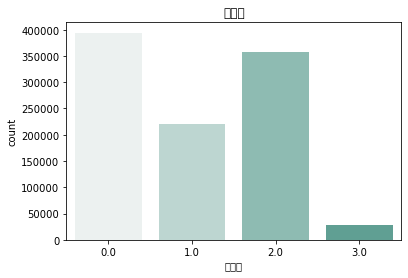

In [18]:
draw_plot('고혈압')

In [19]:
df1_Ao = df1[['성별코드', '허리둘레']].copy()

In [20]:
df1_Ao.loc[(df1_Ao['성별코드'] == 1) & (df1_Ao['허리둘레'] >= 90), '복부비만'] = 1 # 복부비만
df1_Ao.loc[(df1_Ao['성별코드'] == 2) & (df1_Ao['허리둘레'] >= 85), '복부비만'] = 1
df1_Ao.loc[(df1_Ao['성별코드'] == 1) & (df1_Ao['허리둘레'] < 90), '복부비만'] = 0 # 정상
df1_Ao.loc[(df1_Ao['성별코드'] == 2) & (df1_Ao['허리둘레'] < 85), '복부비만'] = 0

In [21]:
df1['복부비만'] = df1_Ao['복부비만']

In [22]:
df1['복부비만']

0         1.0
1         0.0
2         1.0
3         1.0
4         0.0
         ... 
999995    1.0
999996    0.0
999997    0.0
999998    0.0
999999    1.0
Name: 복부비만, Length: 999608, dtype: float64

C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48512 missing from cur

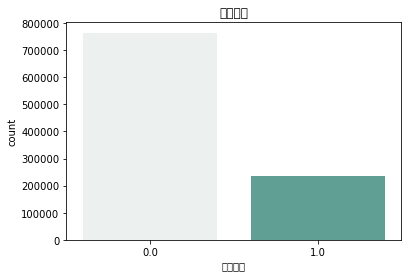

In [23]:
draw_plot('복부비만')

In [24]:
df_weight = df1[['신장', '체중']].copy()

In [25]:
temp = df_weight['신장']/100
df_bmi = round(df_weight['체중'] / (temp * temp), 1)
df_bmi2 = df_bmi.copy()
df_bmi.loc[df_bmi < 25] = 0
df_bmi.loc[(df_bmi >= 25) & (df_bmi < 30)] = 1
df_bmi.loc[df_bmi >= 30] = 2

In [26]:
df1['BMI지수'] = df_bmi2
df1['BMI'] = df_bmi
df1 = df1.drop(['체중', '신장'], axis = 1)

In [27]:
df1['BMI']

0         1.0
1         0.0
2         1.0
3         1.0
4         0.0
         ... 
999995    1.0
999996    1.0
999997    0.0
999998    0.0
999999    1.0
Name: BMI, Length: 999608, dtype: float64

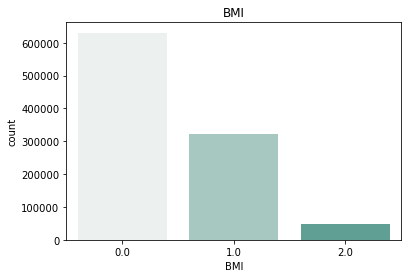

In [28]:
draw_plot('BMI')

In [29]:
df_di = df1['식전혈당'].copy()

In [30]:
df_di.loc[(df_di < 100)] = 0 # 정상
df_di.loc[((df_di >= 100) & (df_di < 126))] = 1 # 전단계
df_di.loc[df_di >= 126] = 2 # 당뇨

In [31]:
df1['당뇨여부'] = df_di

In [32]:
df1['당뇨여부']

0         0.0
1         1.0
2         0.0
3         0.0
4         1.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: 당뇨여부, Length: 999608, dtype: float64

C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sejin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45544 missing from cur

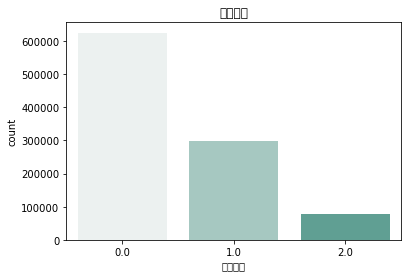

In [33]:
draw_plot('당뇨여부')

In [34]:
df1.head()

,성별코드,연령대코드,허리둘레,수축기혈압,이완기혈압,식전혈당,고혈압,복부비만,BMI지수,BMI,당뇨여부
0,1,8,90.0,120.0,80.0,99.0,2.0,1.0,26.0,1.0,0.0
1,1,7,89.0,130.0,82.0,106.0,2.0,0.0,24.7,0.0,1.0
2,1,9,91.0,120.0,70.0,98.0,1.0,1.0,27.5,1.0,0.0
3,1,11,91.0,145.0,87.0,95.0,2.0,1.0,26.1,1.0,0.0
4,1,11,80.0,138.0,82.0,101.0,2.0,0.0,22.0,0.0,1.0


In [35]:
def Entropy(df, attribute) :
    list1  = list(df[attribute].unique())
    etp = 0
    for i in range(len(list1)):
        q1 = len(df[df[attribute] == list1[i]])/len(df[attribute])
        etp -=  q1*np.log2(q1)
    return etp

def Group_info(df,m_attribute,fix_attribute):
    list2 = list(df[m_attribute].unique())
    info_Entropy = Entropy(df,fix_attribute)
    info_data = 0
    for i in range (len(list2)) :
        q2 = df.loc[df[m_attribute] == list2[i]]
        info_data +=  (len(q2[m_attribute])/len(df[m_attribute]))* Entropy(q2,fix_attribute) 
    
    data = info_Entropy - info_data
    
    return data

In [36]:
Entropy(df1, "당뇨여부")

1.2293418139457521

In [37]:
info = np.array([("성별코드"),("연령대코드"),("고혈압"),("복부비만"),("BMI")])

for i in info:
    print(i, ":", Group_info(df1, i, "당뇨여부"))

성별코드 : 0.013998507405595051
연령대코드 : 0.048145763198219615
고혈압 : 0.027184853060512326
복부비만 : 0.021467817326122907
BMI : 0.021409845196817212


## 훈련데이터 : 999608

In [38]:
x = info
y = np.zeros(5)
for i in range(5):
    y[i] = Group_info(df1, x[i], "당뇨여부")

In [43]:
import pyecharts

ModuleNotFoundError: No module named 'pyecharts'

In [44]:
bar = pyecharts.Bar("엔트로피 정보증가량", "시각화")
bar.add("정보증가량(IG)", x, y, mark_point=["max", "min"])
bar.height = 500
bar.width = 800
bar

NameError: name 'pyecharts' is not defined

In [45]:
pie = pyecharts.Pie("엔트로피 정보증가량","%")
pie.add("엔트로피", x, y, center=[45,45], is_ramdom=True, radius=[30, 50], 
        rosetype='area', is_legend_show=False, is_label_show=True)
pie

NameError: name 'pyecharts' is not defined